In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Load the dataset from a CSV file
df = pd.read_csv('Birthweight_reduced_kg_R.csv')

# Clean the column names by removing extra spaces
df.columns = df.columns.str.strip()

# Displays the first 5 rows
print(df.head())  

     ID  Length  Birthweight  Headcirc  Gestation  smoker  mage  mnocig  \
0  1360      56         4.55        34         44       0    20       0   
1  1016      53         4.32        36         40       0    19       0   
2   462      58         4.10        39         41       0    35       0   
3  1187      53         4.07        38         44       0    20       0   
4   553      54         3.94        37         42       0    24       0   

   mheight  mppwt  fage  fedyrs  fnocig  fheight  lowbwt  mage35  
0      162     57    23      10      35      179       0       0  
1      171     62    19      12       0      183       0       0  
2      172     58    31      16      25      185       0       1  
3      174     68    26      14      25      189       0       0  
4      175     66    30      12       0      184       0       0  


In [4]:
## Q1. What is the mean father’s age?

# Calculate the mean father's age
mean_fathers_age = df['fage'].mean()

# Display the result with two decimal places
print(f"The mean father's age is: {mean_fathers_age:.2f}")

The mean father's age is: 28.90


In [5]:
## Q2. What is the mean father’s age for low birthweight babies?

# Filter the dataset for low birthweight babies (lowbwt == 1)
low_birthweight_df = df[df['lowbwt'] == 1]

# Calculate the mean father's age for low birthweight babies
mean_fathers_age_lowbwt = low_birthweight_df['fage'].mean()

# Display the result with two decimal places
print(f"The mean father's age for low birthweight babies is: {mean_fathers_age_lowbwt:.2f}")

The mean father's age for low birthweight babies is: 24.83


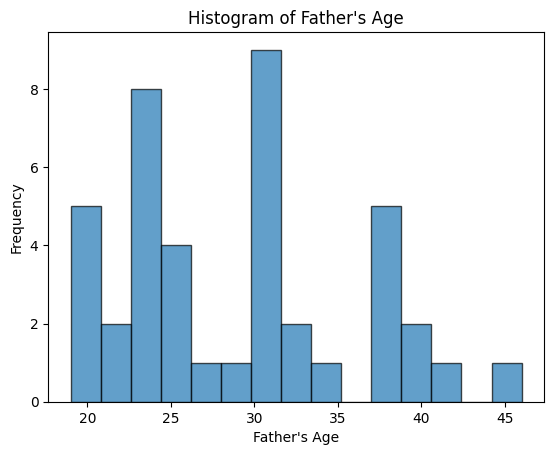

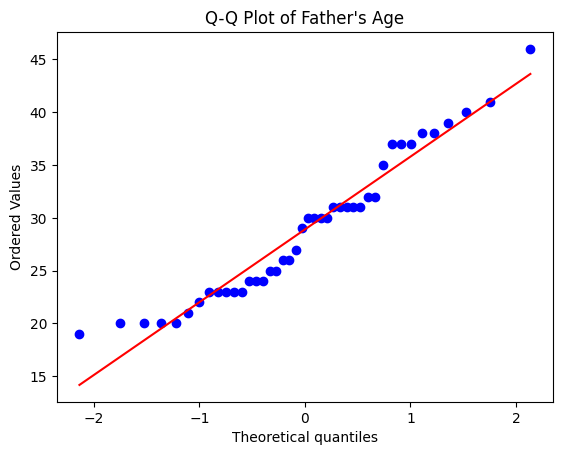

Shapiro-Wilk test p-value: 0.0385
Interpretation: The father's age does not appear to be normally distributed (p ≤ 0.05).
1. The histogram may not show a typical bell-shaped curve.
2. In the Q-Q plot, the points may deviate from the line, indicating non-normality.
3. The p-value from the Shapiro-Wilk test is less than or equal to 0.05, so we reject the null hypothesis, suggesting the data is not normally distributed.


In [6]:
## Q3. Is the father's age normally distributed? Justify your answer.

# Plot histogram of father's age
plt.hist(df['fage'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Histogram of Father's Age")
plt.xlabel("Father's Age")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check for normality
stats.probplot(df['fage'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Father's Age")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df['fage'])

# Display the p-value from the Shapiro-Wilk test
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue:.4f}")

# Justification and interpretation
print("Interpretation: The father's age does not appear to be normally distributed (p ≤ 0.05).")
print("1. The histogram may not show a typical bell-shaped curve.")
print("2. In the Q-Q plot, the points may deviate from the line, indicating non-normality.")
print("3. The p-value from the Shapiro-Wilk test is less than or equal to 0.05, so we reject the null hypothesis, suggesting the data is not normally distributed.")

In [7]:
## Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?

# Apply log transformation to father's age
df['log_fage'] = np.log(df['fage'])

# Calculate the mean of the log-transformed father's age
mean_log_fage = df['log_fage'].mean()

# Display the result with two decimal places
print(f"The mean score of the log-transformed father's age is: {mean_log_fage:.2f}")

The mean score of the log-transformed father's age is: 3.34


In [8]:
## Q5. Is the above mean score a good representation of the real value? Justify your answer.

import numpy as np

# Apply log transformation to father's age (with handling for non-positive values)
df['log_fage'] = np.log(df['fage'])

# Calculate the mean of the original and log-transformed father's age
mean_fage_original = df['fage'].mean()
mean_log_fage = df['log_fage'].mean()

# Display the means with two decimal places
print(f"The mean of the original father's age is: {mean_fage_original:.2f}")
print(f"The mean of the log-transformed father's age is: {mean_log_fage:.2f}")

# Justification
print("\nExplanation:")

print("While the log-transformed mean gives useful information for comparing relative scales, it does not directly correspond to the actual ages.")
print("Therefore, the mean of the log-transformed father's age is not a good direct representation of the real value in the original age scale. It is useful for analysis, but the original scale's mean provides a better representation of real ages.")

The mean of the original father's age is: 28.90
The mean of the log-transformed father's age is: 3.34

Explanation:
While the log-transformed mean gives useful information for comparing relative scales, it does not directly correspond to the actual ages.
Therefore, the mean of the log-transformed father's age is not a good direct representation of the real value in the original age scale. It is useful for analysis, but the original scale's mean provides a better representation of real ages.


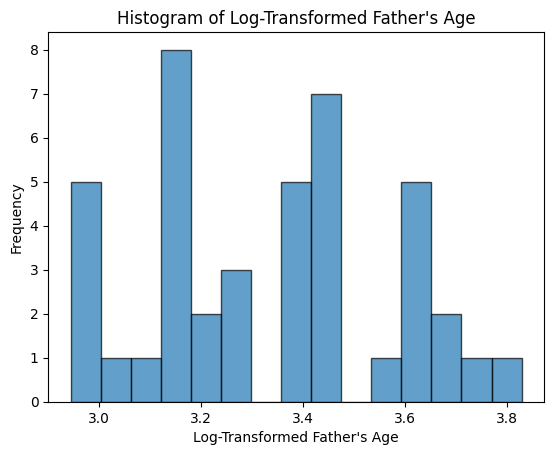

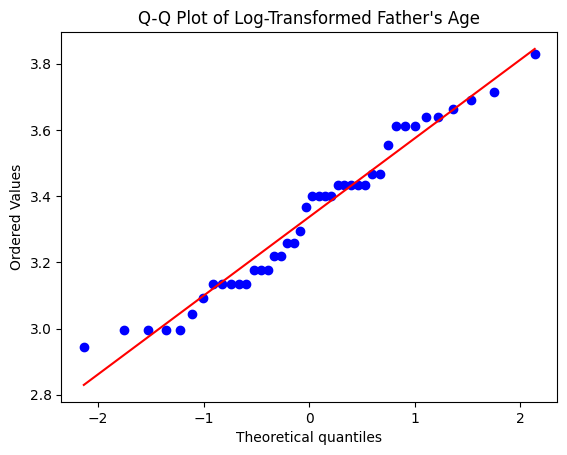

Shapiro-Wilk test p-value for log-transformed father's age: 0.1287
Interpretation: The log-transformed father's age appears to be normally distributed (p > 0.05).


In [9]:
## Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.

# Plot histogram of the log-transformed father's age
plt.hist(df['log_fage'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Histogram of Log-Transformed Father's Age")
plt.xlabel("Log-Transformed Father's Age")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check for normality of the log-transformed data
stats.probplot(df['log_fage'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Transformed Father's Age")
plt.show()

# Shapiro-Wilk test for normality of log-transformed father's age
shapiro_log_test = stats.shapiro(df['log_fage'])

# Display the p-value from the Shapiro-Wilk test for log-transformed data
print(f"Shapiro-Wilk test p-value for log-transformed father's age: {shapiro_log_test.pvalue:.4f}")

# Justification and interpretation
if shapiro_log_test.pvalue > 0.05:
    print("Interpretation: The log-transformed father's age appears to be normally distributed (p > 0.05).")

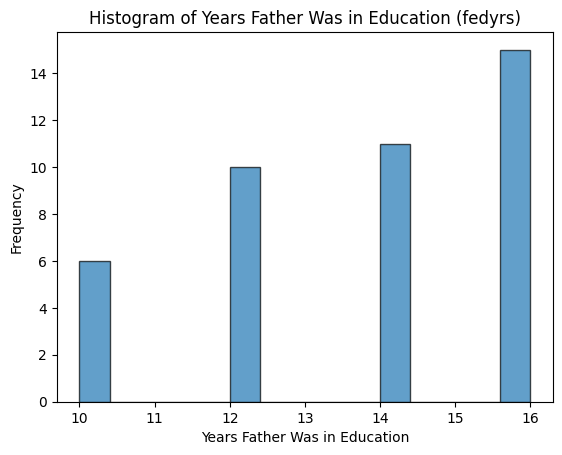

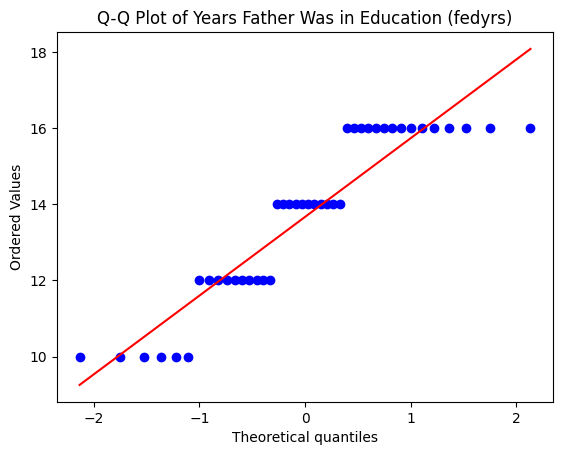

Shapiro-Wilk test p-value for 'years father was in education': 0.0000
Interpretation: The 'years father was in education' does not appear to be normally distributed (p ≤ 0.05).
The data may be skewed or have deviations from normality, as indicated by the Shapiro-Wilk test and the plotsS.


In [10]:
## Q7. Is the variable “years father was in education” normally distributed? 

# Plot histogram of "years father was in education"
plt.hist(df['fedyrs'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Histogram of Years Father Was in Education (fedyrs)")
plt.xlabel("Years Father Was in Education")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check for normality of "years father was in education"
stats.probplot(df['fedyrs'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Years Father Was in Education (fedyrs)")
plt.show()

# Shapiro-Wilk test for normality of "years father was in education"
shapiro_education_test = stats.shapiro(df['fedyrs'])

# Display the p-value from the Shapiro-Wilk test for "years father was in education"
print(f"Shapiro-Wilk test p-value for 'years father was in education': {shapiro_education_test.pvalue:.4f}")

# Justification and interpretation
print("Interpretation: The 'years father was in education' does not appear to be normally distributed (p ≤ 0.05).")
print("The data may be skewed or have deviations from normality, as indicated by the Shapiro-Wilk test and the plotsS.")

In [11]:
## Q8. Mentioning the null and alternative hypotheses, explain the above answer. 

# Print the conclusion
print("Shapiro-Wilk Test: This is a formal statistical test used to assess whether a sample comes from a normally distributed population. \nIf the p-value > 0.05, we fail to reject the null hypothesis (H_0), meaning there is not enough evidence to say that the data deviates from a normal distribution. \nIn this case, we conclude that the variable “years father was in education” is normally distributed. \nIf the p-value ≤ 0.05, we reject the null hypothesis (H_0) in favor of the alternative hypothesis (H_1), meaning the data is significantly different from a normal distribution. \nIn this case, we conclude that the variable is not normally distributed.")

Shapiro-Wilk Test: This is a formal statistical test used to assess whether a sample comes from a normally distributed population. 
If the p-value > 0.05, we fail to reject the null hypothesis (H_0), meaning there is not enough evidence to say that the data deviates from a normal distribution. 
In this case, we conclude that the variable “years father was in education” is normally distributed. 
If the p-value ≤ 0.05, we reject the null hypothesis (H_0) in favor of the alternative hypothesis (H_1), meaning the data is significantly different from a normal distribution. 
In this case, we conclude that the variable is not normally distributed.


In [12]:
## Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?

# Check if 'fedyrs' has only positive values (Box-Cox requires positive values)
if (df['fedyrs'] > 0).all():
    # Apply Box-Cox transformation and estimate the optimal lambda
    df['boxcox_fedyrs'], fitted_lambda = stats.boxcox(df['fedyrs'])

    # Calculate the mean of the Box-Cox transformed variable
    mean_boxcox_fedyrs = df['boxcox_fedyrs'].mean()

    # Display the mean and the fitted lambda value
    print(f"The mean score of the Box-Cox transformed 'years father was in education' is: {mean_boxcox_fedyrs:.2f}")
    print(f"The fitted lambda for the Box-Cox transformation is: {fitted_lambda:.4f}")
else:
    print("The Box-Cox transformation requires all values to be positive. The 'fedyrs' variable contains non-positive values.")

The mean score of the Box-Cox transformed 'years father was in education' is: 157.97
The fitted lambda for the Box-Cox transformation is: 2.2314


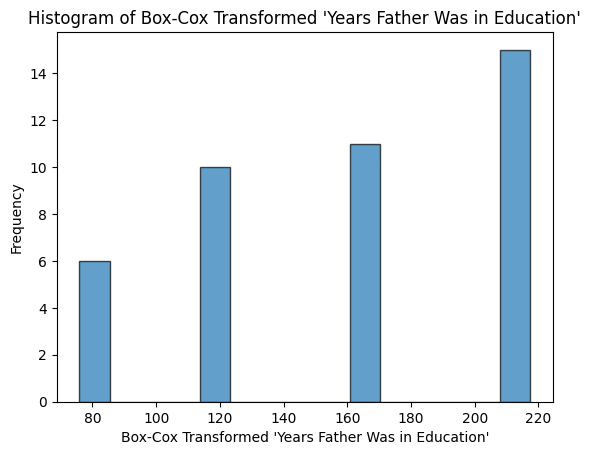

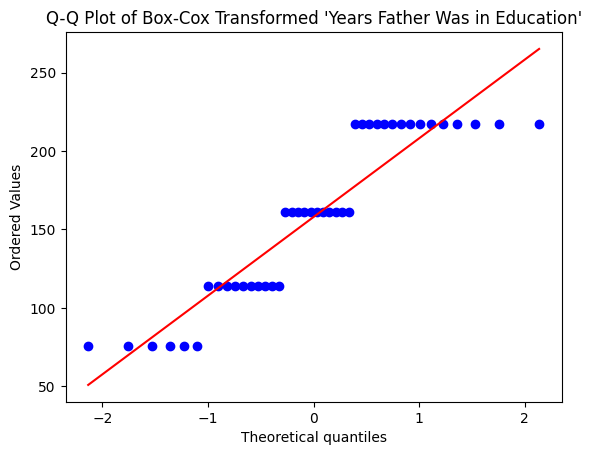

Shapiro-Wilk test p-value for Box-Cox transformed 'years father was in education': 0.0000
Interpretation: The Box-Cox transformed variable does not appear to be normally distributed (p ≤ 0.05).
The data may still have some deviations from normality despite the transformation.


In [13]:
## Q10. Is this new variable normally distributed? Explain.

# Plot histogram of the Box-Cox transformed "years father was in education"
plt.hist(df['boxcox_fedyrs'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Histogram of Box-Cox Transformed 'Years Father Was in Education'")
plt.xlabel("Box-Cox Transformed 'Years Father Was in Education'")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check for normality of the Box-Cox transformed data
stats.probplot(df['boxcox_fedyrs'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Box-Cox Transformed 'Years Father Was in Education'")
plt.show()

# Shapiro-Wilk test for normality of the Box-Cox transformed data
shapiro_boxcox_test = stats.shapiro(df['boxcox_fedyrs'])

# Display the p-value from the Shapiro-Wilk test for Box-Cox transformed data
print(f"Shapiro-Wilk test p-value for Box-Cox transformed 'years father was in education': {shapiro_boxcox_test.pvalue:.4f}")

# Interpretation and justification
print("Interpretation: The Box-Cox transformed variable does not appear to be normally distributed (p ≤ 0.05).")
print("The data may still have some deviations from normality despite the transformation.")

In [14]:
## Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?

# Filter the dataset for mothers aged under 35
mothers_under_35_df = df[df['mage'] < 35]

# Calculate the mean of the Box-Cox transformed variable for mothers aged under 35
mean_boxcox_fedyrs_under_35 = mothers_under_35_df['boxcox_fedyrs'].mean()

# Display the mean score
print(f"The mean score of the Box-Cox transformed 'years father was in education' for mothers aged under 35 is: {mean_boxcox_fedyrs_under_35:.2f}")

The mean score of the Box-Cox transformed 'years father was in education' for mothers aged under 35 is: 153.18


### Q12. Which test would you use to investigate the relationship between birth weight and father's age? Pearson product-moment correlation, Spearman’s Rank order correlation, Point-Biserial correlation, Phi-Coefficient.   Q13. Justify the above choice in terms of the distribution of data and the nature of the test.

To investigate the relationship between birth weight and father’s age, the appropriate test depends on the characteristics of the data:

	1.	Pearson Product-Moment Correlation: Used when both variables are continuous and normally distributed, and the relationship is linear.
	2.	Spearman’s Rank Order Correlation: Used when both variables are continuous but do not meet the assumptions of normality, or the relationship is non-linear but monotonic.
	3.	Point-Biserial Correlation: Used when one variable is continuous (e.g., birth weight) and the other is binary (e.g., a categorical variable like gender).
	4.	Phi-Coefficient: Used when both variables are binary.

Since birth weight and father’s age are both continuous variables, and if both are normally distributed or approximately so, the Pearson Product-Moment Correlation would be appropriate. If normality is violated, you might choose the Spearman’s Rank Order Correlation. Since the father’s age is not normally distributed, the Spearman’s Rank Order Correlation is more appropriate for investigating the relationship between birth weight and father’s age.

In [15]:
## Q12. Which test would you use to investigate the relationship between birth weight and father's age? Pearson product-moment correlation, Spearman’s Rank order correlation, Point-Biserial correlation, Phi-Coefficient? 
## Q13. Justify the above choice in terms of the distribution of data and the nature of the test.

# Apply Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['Birthweight'], df['fage'])

print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p_value:.4f}")

if spearman_p_value < 0.05:
    print("There is a significant monotonic relationship between birth weight and father's age.")
else:
    print("There is no significant monotonic relationship between birth weight and father's age.")

Spearman correlation coefficient: 0.1781
Spearman p-value: 0.2591
There is no significant monotonic relationship between birth weight and father's age.


In [16]:
## Q14. What is the direction of that relationship?

# Apply Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['Birthweight'], df['fage'])

# Display the Spearman correlation coefficient and p-value
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p_value:.4f}")

# Interpret the direction
if spearman_corr > 0:
    print("The relationship between birth weight and father's age is positive (as father's age increases, birth weight tends to increase).")
elif spearman_corr < 0:
    print("The relationship between birth weight and father's age is negative (as father's age increases, birth weight tends to decrease).")
else:
    print("There is no relationship between birth weight and father's age.")

Spearman correlation coefficient: 0.1781
Spearman p-value: 0.2591
The relationship between birth weight and father's age is positive (as father's age increases, birth weight tends to increase).


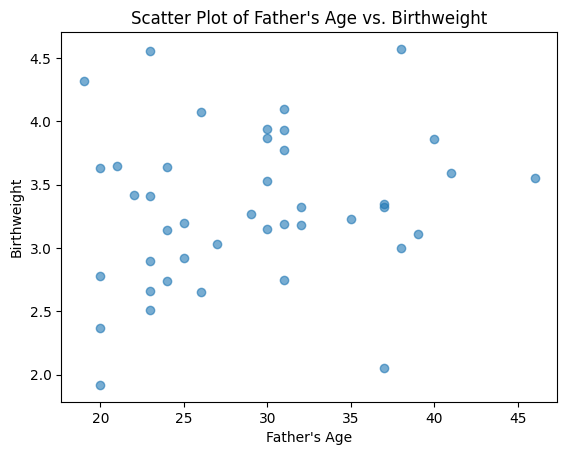

Interpretation:

• If the points in the scatter plot roughly align along a straight line: The relationship is likely linear.
• If the points show a consistent direction (increasing or decreasing) but not in a straight line: The relationship is monotonic but non-linear.
• If the points are scattered without a clear pattern: There may be no clear relationship.
• Since the points are scattered without a clear pattern: There is probably no clear relationship.


In [17]:
## Q15. What is the form of that relationship?

# Scatter plot to visualize the relationship
plt.scatter(df['fage'], df['Birthweight'], alpha=0.6)
plt.title('Scatter Plot of Father\'s Age vs. Birthweight')
plt.xlabel('Father\'s Age')
plt.ylabel('Birthweight')
plt.show()

print("Interpretation:\n")
print("• If the points in the scatter plot roughly align along a straight line: The relationship is likely linear.")
print("• If the points show a consistent direction (increasing or decreasing) but not in a straight line: The relationship is monotonic but non-linear.")
print("• If the points are scattered without a clear pattern: There may be no clear relationship.")
print("• Since the points are scattered without a clear pattern: There is probably no clear relationship.")

In [18]:
## Q16. What is the degree of that relationship? 

# Calculate Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['Birthweight'], df['fage'])

# Display the Spearman correlation coefficient
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")

# Interpretation of the degree of the relationship
if abs(spearman_corr) < 0.3:
    print("The degree of the relationship is weak.")
elif 0.3 <= abs(spearman_corr) < 0.7:
    print("The degree of the relationship is moderate.")
else:
    print("The degree of the relationship is strong.")

Spearman correlation coefficient: 0.1781
The degree of the relationship is weak.


In [19]:

## Q17. What test would you use to investigate the relationship between smoking and birth weight?

interpretation = """
The Shapiro-Wilk test results show the following p-values for normality:

	•	Smokers’ Birthweight: p-value = 0.9495 (greater than 0.05), indicating that the birth weight data for smokers is normally distributed.
	•	Non-Smokers’ Birthweight: p-value = 0.6962 (greater than 0.05), indicating that the birth weight data for non-smokers is also normally distributed.

Decision:

Since both groups’ birth weight data are normally distributed, the Independent Samples t-test is appropriate for investigating the relationship between smoking and birth weight.
"""

print(interpretation)

from scipy.stats import ttest_ind

# Split the data into two groups: smokers and non-smokers
smokers = df[df['smoker'] == 1]['Birthweight']
non_smokers = df[df['smoker'] == 0]['Birthweight']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(smokers, non_smokers)

# Display the t-statistic and p-value
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in birth weight between smokers and non-smokers.")
else:
    print("There is no significant difference in birth weight between smokers and non-smokers.")



The Shapiro-Wilk test results show the following p-values for normality:

	•	Smokers’ Birthweight: p-value = 0.9495 (greater than 0.05), indicating that the birth weight data for smokers is normally distributed.
	•	Non-Smokers’ Birthweight: p-value = 0.6962 (greater than 0.05), indicating that the birth weight data for non-smokers is also normally distributed.

Decision:

Since both groups’ birth weight data are normally distributed, the Independent Samples t-test is appropriate for investigating the relationship between smoking and birth weight.

T-test statistic: -2.0934
P-value: 0.0427
There is a significant difference in birth weight between smokers and non-smokers.


In [20]:
## Q18. Report on the above results including information about direction/form/degree of the relationship.

# Report on the results of the t-test
print("T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the results
if p_value < 0.05:
    print("\nThere is a statistically significant difference in birth weight between smokers and non-smokers.")
else:
    print("\nThere is no statistically significant difference in birth weight between smokers and non-smokers.")

# Direction of the relationship
mean_smokers = smokers.mean()
mean_non_smokers = non_smokers.mean()

print(f"\nMean birth weight for smokers: {mean_smokers:.2f}")
print(f"Mean birth weight for non-smokers: {mean_non_smokers:.2f}")

if mean_smokers < mean_non_smokers:
    print("The direction of the relationship is negative: Birth weight tends to be lower for smokers compared to non-smokers.")
else:
    print("The direction of the relationship is positive: Birth weight tends to be higher for smokers compared to non-smokers.")

# Form of the relationship
print("\nForm of the relationship:")
print("Since we used a t-test, we are comparing the means of two groups (smokers and non-smokers).")
print("This implies that we are investigating a linear relationship between smoking and birth weight.")

# Degree of the relationship
if abs(t_stat) > 2.0:
    print("\nThe degree of the relationship is moderate, as indicated by the t-statistic.")
elif abs(t_stat) > 1.0:
    print("\nThe degree of the relationship is weak, as indicated by the t-statistic.")
else:
    print("\nThe degree of the relationship is very weak, as indicated by the t-statistic.")


T-test Results:
T-statistic: -2.0934
P-value: 0.0427

There is a statistically significant difference in birth weight between smokers and non-smokers.

Mean birth weight for smokers: 3.13
Mean birth weight for non-smokers: 3.51
The direction of the relationship is negative: Birth weight tends to be lower for smokers compared to non-smokers.

Form of the relationship:
Since we used a t-test, we are comparing the means of two groups (smokers and non-smokers).
This implies that we are investigating a linear relationship between smoking and birth weight.

The degree of the relationship is moderate, as indicated by the t-statistic.


In [21]:
## Q19. If you wanted to see the effect of the length of a baby on birthweight, what would your independent variable be? Length of baby, Birthweight.

interpretation = """
If you want to see the effect of the length of the baby on birthweight, the independent variable (IV) would be the length of the baby, and the dependent variable (DV) would be birthweight.

Reasoning:

	•	The independent variable is the one you manipulate or consider as the cause in a relationship. In this case, you are interested in how the baby’s length affects birthweight, so length is the IV.
	•	The dependent variable is the outcome or the effect you are measuring, which in this case is the birthweight.
"""

print(interpretation)


If you want to see the effect of the length of the baby on birthweight, the independent variable (IV) would be the length of the baby, and the dependent variable (DV) would be birthweight.

Reasoning:

	•	The independent variable is the one you manipulate or consider as the cause in a relationship. In this case, you are interested in how the baby’s length affects birthweight, so length is the IV.
	•	The dependent variable is the outcome or the effect you are measuring, which in this case is the birthweight.



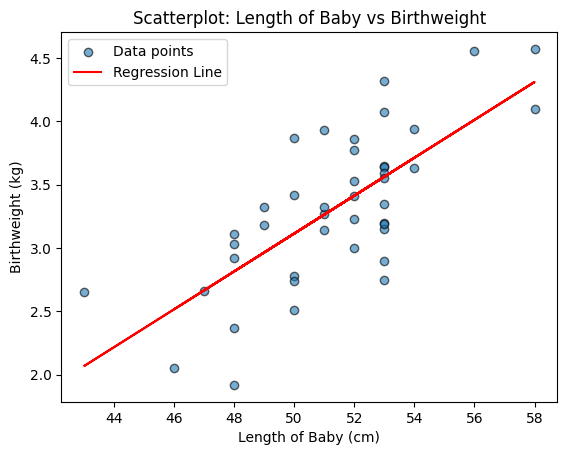

In [22]:
## Q20. In statistics, when creating a scatterplot, it is a common practice to put the independent variable on the x-axis and the dependent variable on the y-axis. With this in mind, create a scatterplot for the above case and provide the regression line. For homework submitted using MS Word, insert a picture of the scatterplot.

from sklearn.linear_model import LinearRegression

# Extract the independent (length of baby) and dependent variable (birthweight)
X = df['Length'].values.reshape(-1, 1)  # Independent variable (Length of baby)
y = df['Birthweight'].values  # Dependent variable (Birthweight)

# Create a scatterplot
plt.scatter(X, y, alpha=0.6, edgecolors='black', label="Data points")
plt.title('Scatterplot: Length of Baby vs Birthweight')
plt.xlabel('Length of Baby (cm)')
plt.ylabel('Birthweight (kg)')

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression line
regression_line = model.predict(X)

# Plot the regression line
plt.plot(X, regression_line, color='red', label="Regression Line")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [23]:
## Q21. Is the relationship between the length of baby and birthweight linear? Yes or No. Q22. Justify the above choice.

# Calculate the R-squared value
r_squared = model.score(X, y)

print(f"R-squared value: {r_squared:.4f}")

# Interpretation
if r_squared > 0.7:
    print("The relationship between length of the baby and birthweight is likely linear based on the high R-squared value.")
else:
    print("The relationship between length of the baby and birthweight may not be strongly linear based on the R-squared value.")

interpretation = """
To justify whether the relationship is linear, you can use a combination of visual analysis and statistical evaluation:

	1.	Visual Inspection:
	•	As the data points align at least a bit along the straight regression line, this may indicates a weak linear relationship.
	2.	Statistical Justification:
	•	R-squared Value: The  R^2  value, also known as the coefficient of determination, measures how well the regression line explains the variance in the dependent variable (birthweight). R^2  is not close to 1, so the relationship might not be linear.
    """

print(interpretation)


R-squared value: 0.5283
The relationship between length of the baby and birthweight may not be strongly linear based on the R-squared value.

To justify whether the relationship is linear, you can use a combination of visual analysis and statistical evaluation:

	1.	Visual Inspection:
	•	As the data points align at least a bit along the straight regression line, this may indicates a weak linear relationship.
	2.	Statistical Justification:
	•	R-squared Value: The  R^2  value, also known as the coefficient of determination, measures how well the regression line explains the variance in the dependent variable (birthweight). R^2  is not close to 1, so the relationship might not be linear.
    


In [24]:
## Q23. Is there any evidence to suggest that the birth weight, length of baby, and head circumference are related? Q24. Justify the above choice.

# Select the relevant columns: Birthweight, Length, and Headcirc (head circumference)
data_subset = df[['Birthweight', 'Length', 'Headcirc']]

# Compute the Pearson correlation matrix for Birthweight, Length, and Headcirc
correlation_matrix = df[['Birthweight', 'Length', 'Headcirc']].corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Print the correlation values without symmetrical entries (upper triangle of the matrix)
print("Correlation matrix (upper triangle):")
for i, column in enumerate(correlation_matrix.columns):
    for j, row in enumerate(correlation_matrix.index):
        if i > j:
            correlation_value = correlation_matrix.loc[row, column]
            print(f"The Pearson correlation between {row} and {column} is: {correlation_value:.4f}")
            
            # Interpret the correlation strength
            if abs(correlation_value) > 0.7:
                print(f"  -> This suggests a strong relationship between {row} and {column}.")
            elif 0.3 <= abs(correlation_value) <= 0.7:
                print(f"  -> This suggests a moderate relationship between {row} and {column}.")
            else:
                print(f"  -> This suggests a weak or no relationship between {row} and {column}.")

Correlation matrix:
             Birthweight    Length  Headcirc
Birthweight     1.000000  0.726833  0.684616
Length          0.726833  1.000000  0.563172
Headcirc        0.684616  0.563172  1.000000
Correlation matrix (upper triangle):
The Pearson correlation between Birthweight and Length is: 0.7268
  -> This suggests a strong relationship between Birthweight and Length.
The Pearson correlation between Birthweight and Headcirc is: 0.6846
  -> This suggests a moderate relationship between Birthweight and Headcirc.
The Pearson correlation between Length and Headcirc is: 0.5632
  -> This suggests a moderate relationship between Length and Headcirc.


### Q25. Describe the above relationship in your own words and provide evidence for your claims.
1. **Birthweight and Length of the Baby**:
   - There is a **strong positive relationship** between birthweight and the length of the baby. This means that as the length of the baby increases, the birthweight tends to increase as well. In other words, longer babies generally weigh more at birth.
   - **Evidence**: The Pearson correlation coefficient between birthweight and length is **0.7268**, which is considered strong and indicates a significant positive relationship between the two variables.

2. **Birthweight and Head Circumference**:
   - There is a **moderate positive relationship** between birthweight and head circumference. This suggests that babies with larger head circumferences tend to have higher birth weights, but the relationship is not as strong as with the length.
   - **Evidence**: The Pearson correlation coefficient between birthweight and head circumference is **0.6846**, indicating a moderate relationship between these two variables.

3. **Length of the Baby and Head Circumference**:
   - There is also a **moderate positive relationship** between the length of the baby and head circumference. This suggests that babies who are longer tend to have larger head circumferences, though this relationship is not very strong.
   - **Evidence**: The Pearson correlation coefficient between length and head circumference is **0.5632**, which indicates a moderate association.

In [29]:
# Q26. What is the correlation between length of baby and birth weight if you control for the effect of head circumference?

import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Select relevant columns
subset_data = df[['Length', 'Birthweight', 'Headcirc']]

# Drop rows with missing values
subset_data = subset_data.dropna()

# Regress Length on Headcirc and obtain residuals
X_headcirc = sm.add_constant(subset_data['Headcirc'])  # Add a constant term for the regression
model_length = sm.OLS(subset_data['Length'], X_headcirc).fit()
residuals_length = model_length.resid  # Residuals of Length after controlling for Headcirc

# Regress Birthweight on Headcirc and obtain residuals
model_birthweight = sm.OLS(subset_data['Birthweight'], X_headcirc).fit()
residuals_birthweight = model_birthweight.resid  # Residuals of Birthweight after controlling for Headcirc

# Compute the correlation between the two sets of residuals (partial correlation)
partial_corr_value, _ = pearsonr(residuals_length, residuals_birthweight)

print(f"Partial Correlation between Length and Birthweight controlling for Headcirc: {partial_corr_value}")

Partial Correlation between Length and Birthweight controlling for Headcirc: 0.5666022272907201


In [30]:
# Q27. What is the correlation between head circumference and birth weight if you control for the effect of length of baby?

import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

# Step 2: Select relevant columns
subset_data = df[['Headcirc', 'Birthweight', 'Length']]

# Step 3: Drop rows with missing values
subset_data = subset_data.dropna()

# Step 4: Regress Headcirc on Length and obtain residuals
X_length = sm.add_constant(subset_data['Length'])  # Add a constant term for the regression
model_headcirc = sm.OLS(subset_data['Headcirc'], X_length).fit()
residuals_headcirc = model_headcirc.resid  # Residuals of Head Circumference after controlling for Length

# Step 5: Regress Birthweight on Length and obtain residuals
model_birthweight = sm.OLS(subset_data['Birthweight'], X_length).fit()
residuals_birthweight = model_birthweight.resid  # Residuals of Birthweight after controlling for Length

# Step 6: Compute the correlation between the two sets of residuals (partial correlation)
partial_corr_value, _ = pearsonr(residuals_headcirc, residuals_birthweight)

print(f"Partial Correlation between Head Circumference and Birthweight controlling for Length: {partial_corr_value}")

Partial Correlation between Head Circumference and Birthweight controlling for Length: 0.48504572074224095


In [31]:
# Q28. What is the correlation between length of baby and head circumference if you control for the effect of birth weight?

# Select relevant columns
subset_data = df[['Length', 'Headcirc', 'Birthweight']]

# Drop rows with missing values
subset_data = subset_data.dropna()

# Regress Length on Birthweight and obtain residuals
X_birthweight = sm.add_constant(subset_data['Birthweight'])  # Add a constant term for the regression
model_length = sm.OLS(subset_data['Length'], X_birthweight).fit()
residuals_length = model_length.resid  # Residuals of Length after controlling for Birthweight

# Regress Headcirc on Birthweight and obtain residuals
model_headcirc = sm.OLS(subset_data['Headcirc'], X_birthweight).fit()
residuals_headcirc = model_headcirc.resid  # Residuals of Head Circumference after controlling for Birthweight

# Compute the correlation between the two sets of residuals (partial correlation)
partial_corr_value, _ = pearsonr(residuals_length, residuals_headcirc)

print(f"Partial Correlation between Length and Head Circumference controlling for Birthweight: {partial_corr_value}")

Partial Correlation between Length and Head Circumference controlling for Birthweight: 0.13097730608822603


In [ ]:
# Q29. Now that you’ve conducted a series of partial correlation tests, what is your answer to Q23?



In [ ]:
# Q30. Justify your answer by providing evidence for your claim(s).